In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.plotly as py
import cufflinks as cf
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

tls.set_credentials_file(username='wavgomes', api_key='wlT59F2bu4oaOJYKnipp')
tls.set_config_file(world_readable=False,sharing='private')
cf.go_offline()

In [302]:
train = pd.read_csv('dataset/dengue_features_train.csv')
test = pd.read_csv('dataset/dengue_features_test.csv')

In [303]:
train.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k        ...          \
0  0.177617                 12.42             297.572857        ...           
1  0.155486                 22.82             298.211429        ...           
2  0.170843                 34.54             298.781429        ...           
3  0.235886                 15.36             298.987143        ...           
4  0.247340                  7.52             299.518571        ...           

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8  

[5 rows x 24 columns]

In [304]:
train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [305]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [306]:
train.shape

(1456, 24)

In [307]:
train.describe().T

count         mean        std  \
year                                   1456.0  2001.031593   5.408314   
weekofyear                             1456.0    26.503434  15.019437   
ndvi_ne                                1262.0     0.142294   0.140531   
ndvi_nw                                1404.0     0.130553   0.119999   
ndvi_se                                1434.0     0.203783   0.073860   
ndvi_sw                                1434.0     0.202305   0.083903   
precipitation_amt_mm                   1443.0    45.760388  43.715537   
reanalysis_air_temp_k                  1446.0   298.701852   1.362420   
reanalysis_avg_temp_k                  1446.0   299.225578   1.261715   
reanalysis_dew_point_temp_k            1446.0   295.246356   1.527810   
reanalysis_max_air_temp_k              1446.0   303.427109   3.234601   
reanalysis_min_air_temp_k              1446.0   295.719156   2.565364   
reanalysis_precip_amt_kg_per_m2        1446.0    40.151819  43.434399   
reanalysis_relative_humidity_percent   1446.0    82.161959   7.153897   
reanalysis_sat_precip_amt_mm           1443.0    45.760388  43.715537   
reanalysis_specific_humidity_g_per_kg  1446.0    16.746427   1.542494   
reanalysis_tdtr_k                      1446.0     4.903754   3.546445   
station_avg_temp_c                     1413.0    27.185783   1.292347   
station_diur_temp_rng_c                1413.0     8.059328   2.128568   
station_max_temp_c                     1436.0    32.452437   1.959318   
station_min_temp_c                     1442.0    22.102150   1.574066   
station_precip_mm                      1434.0    39.326360  47.455314   

                                               min          25%          50%  \
year                                   1990.000000  1997.000000  2002.000000   
weekofyear                                1.000000    13.750000    26.500000   
ndvi_ne                                  -0.406250     0.044950     0.128817   
ndvi_nw                                  -0.456100     0.049217     0.121429   
ndvi_se                                  -0.015533     0.155087     0.196050   
ndvi_sw                                  -0.063457     0.144209     0.189450   
precipitation_amt_mm                      0.000000     9.800000    38.340000   
reanalysis_air_temp_k                   294.635714   297.658929   298.646429   
reanalysis_avg_temp_k                   294.892857   298.257143   299.289286   
reanalysis_dew_point_temp_k             289.642857   294.118929   295.640714   
reanalysis_max_air_temp_k               297.800000   301.000000   302.400000   
reanalysis_min_air_temp_k               286.900000   293.900000   296.200000   
reanalysis_precip_amt_kg_per_m2           0.000000    13.055000    27.245000   
reanalysis_relative_humidity_percent     57.787143    77.177143    80.301429   
reanalysis_sat_precip_amt_mm              0.000000     9.800000    38.340000   
reanalysis_specific_humidity_g_per_kg    11.715714    15.557143    17.087143   
reanalysis_tdtr_k                         1.357143     2.328571     2.857143   
station_avg_temp_c                       21.400000    26.300000    27.414286   
station_diur_temp_rng_c                   4.528571     6.514286     7.300000   
station_max_temp_c                       26.700000    31.100000    32.800000   
station_min_temp_c                       14.700000    21.100000    22.200000   
station_precip_mm                         0.000000     8.700000    23.850000   

                                               75%          max  
year                                   2005.000000  2010.000000  
weekofyear                               39.250000    53.000000  
ndvi_ne                                   0.248483     0.508357  
ndvi_nw                                   0.216600     0.454429  
ndvi_se                                   0.248846     0.538314  
ndvi_sw                                   0.246982     0.546017  
precipitation_amt_mm                     70.235000   390.

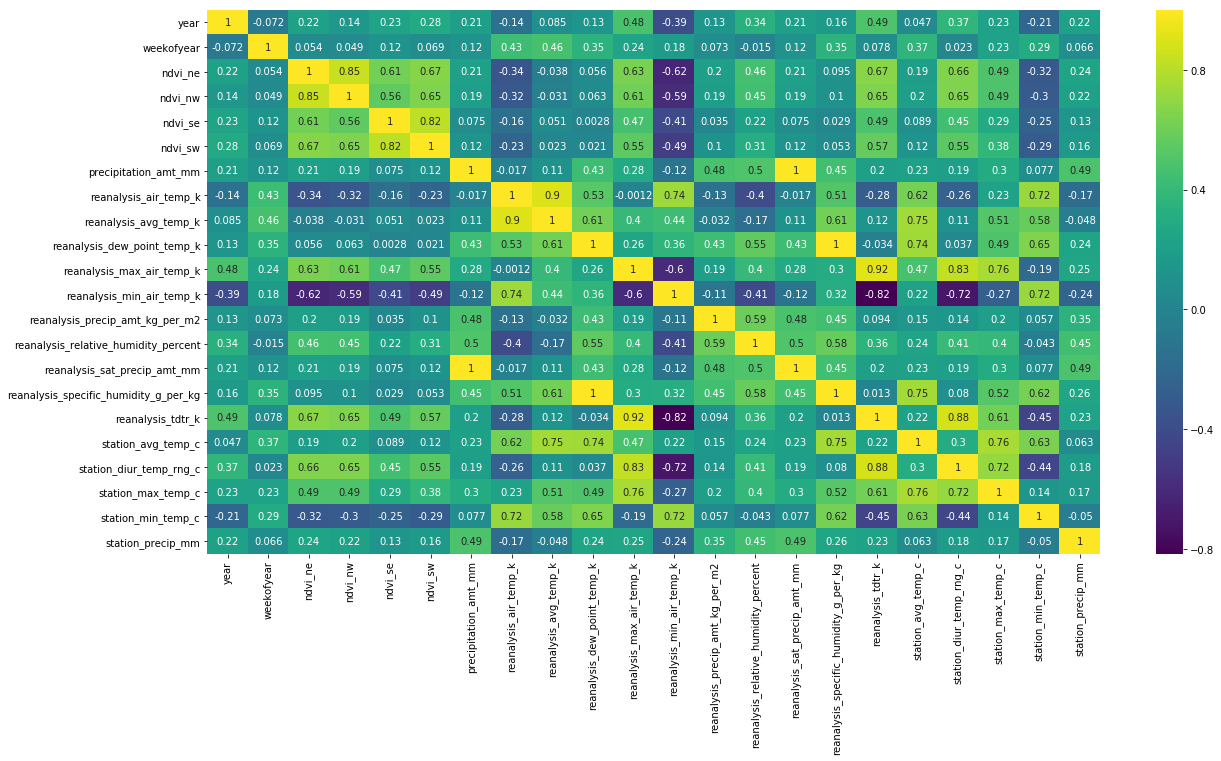

In [308]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),cmap='viridis',annot=True)

In [309]:
labels = pd.read_csv('dataset/dengue_labels_train.csv')

In [310]:
labels.head()

city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

In [311]:
labels.shape

(1456, 4)

In [312]:
train_labels = pd.merge(train,labels,on=['city','year','weekofyear'],how='inner') 

In [313]:
train_labels['week_start_date'] = pd.to_datetime(train_labels['week_start_date'])

In [314]:
train_labels['month'] = train_labels['week_start_date'].dt.strftime('%m')

In [315]:
train_labels.groupby(['city','year']).sum().total_cases

city  year
iq    2000       4
      2001      14
      2002     704
      2003     114
      2004     638
      2005     311
      2006     436
      2007     365
      2008     801
      2009     324
      2010     223
sj    1990     866
      1991    2801
      1992    2371
      1993    1156
      1994    6533
      1995    1333
      1996     855
      1997    1454
      1998    4595
      1999    1633
      2000     492
      2001    1463
      2002     452
      2003     949
      2004     610
      2005    1805
      2006     550
      2007    1969
      2008     106
Name: total_cases, dtype: int64

In [331]:
train_iq = train_labels[train_labels.city == 'iq']
train_sj = train_labels[train_labels.city != 'iq']

In [317]:
total_cases_by_city_and_month = pd.DataFrame(train_labels.groupby(['city','month']).sum().total_cases) 

In [318]:
total_cases_by_city_and_month.reset_index(inplace=True)

In [319]:
total_cases_by_city_and_month

city month  total_cases
0    iq    01          604
1    iq    02          503
2    iq    03          290
3    iq    04          285
4    iq    05          194
5    iq    06          135
6    iq    07          153
7    iq    08          126
8    iq    09          277
9    iq    10          458
10   iq    11          393
11   iq    12          516
12   sj    01         2828
13   sj    02         1519
14   sj    03         1051
15   sj    04          902
16   sj    05          802
17   sj    06         1175
18   sj    07         2462
19   sj    08         3459
20   sj    09         4237
21   sj    10         6106
22   sj    11         4451
23   sj    12         3001

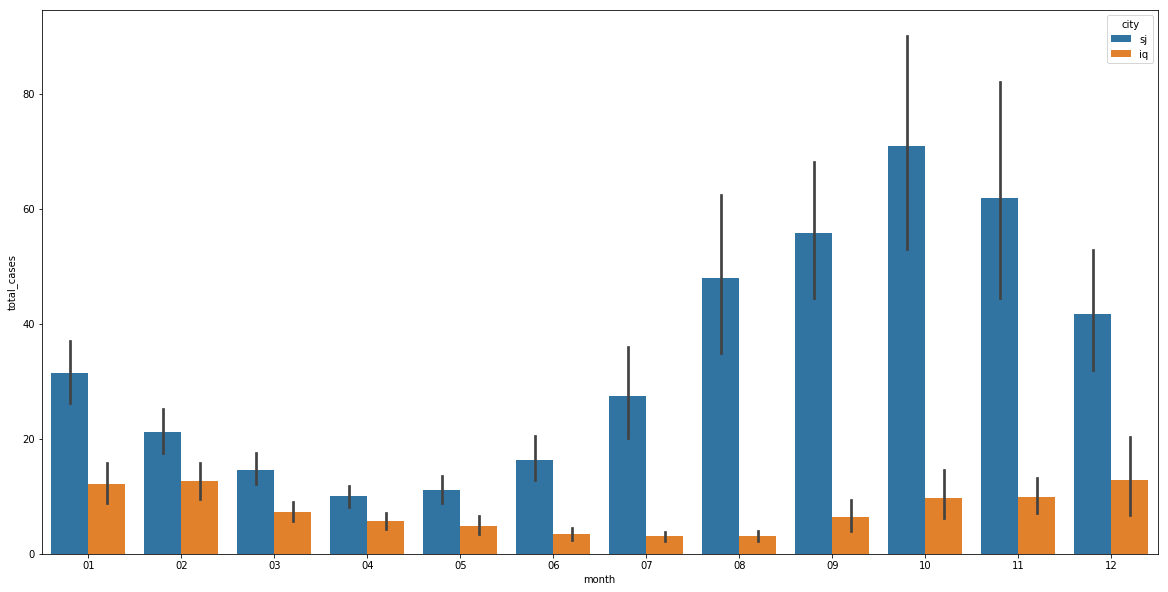

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(train_labels.month,train_labels.total_cases, hue=train_labels.city)

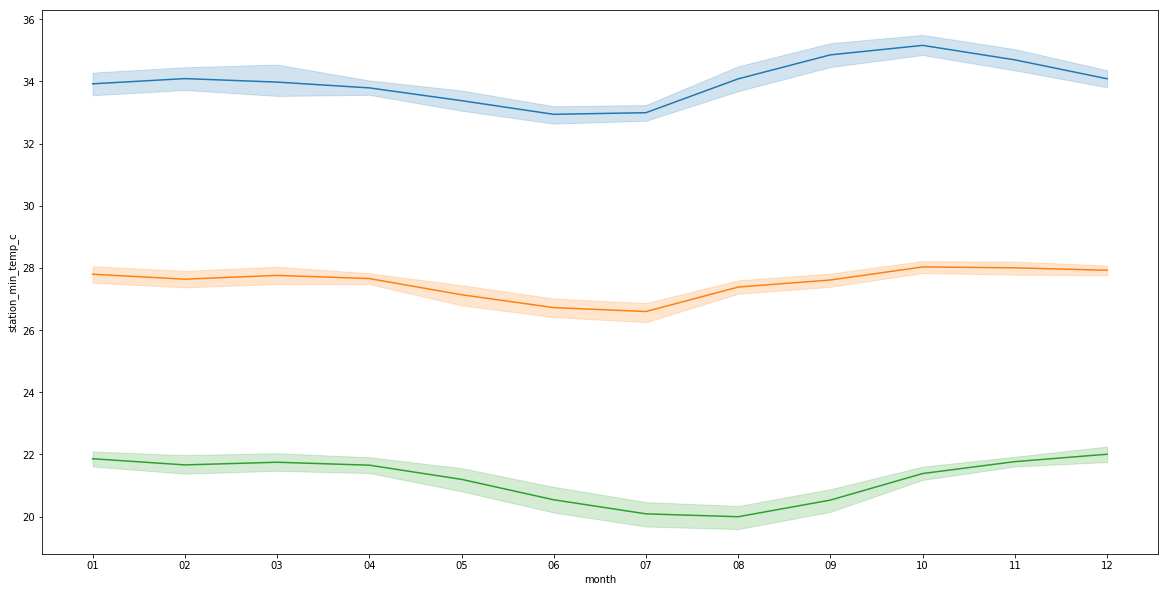

In [23]:
plt.figure(figsize=(20,10))
sns.lineplot(x=train_iq.month,y=train_iq['station_max_temp_c'])
sns.lineplot(x=train_iq.month,y=train_iq['station_avg_temp_c'])
sns.lineplot(x=train_iq.month,y=train_iq['station_min_temp_c'])

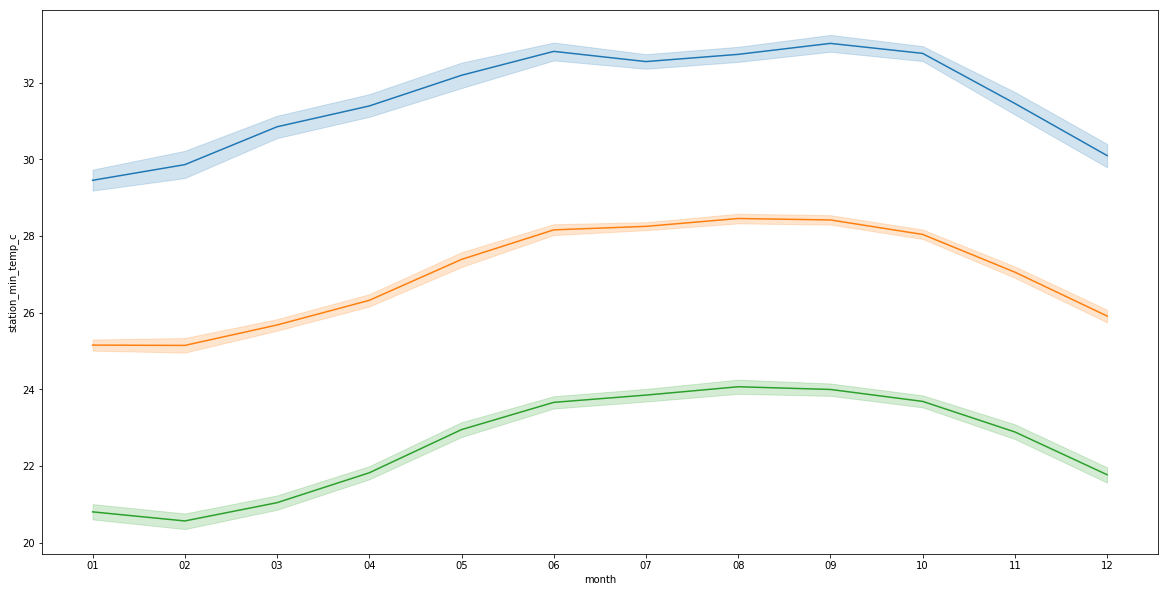

In [24]:
plt.figure(figsize=(20,10))
sns.lineplot(x=train_sj.month,y=train_sj['station_max_temp_c'])
sns.lineplot(x=train_sj.month,y=train_sj['station_avg_temp_c'])
sns.lineplot(x=train_sj.month,y=train_sj['station_min_temp_c'])

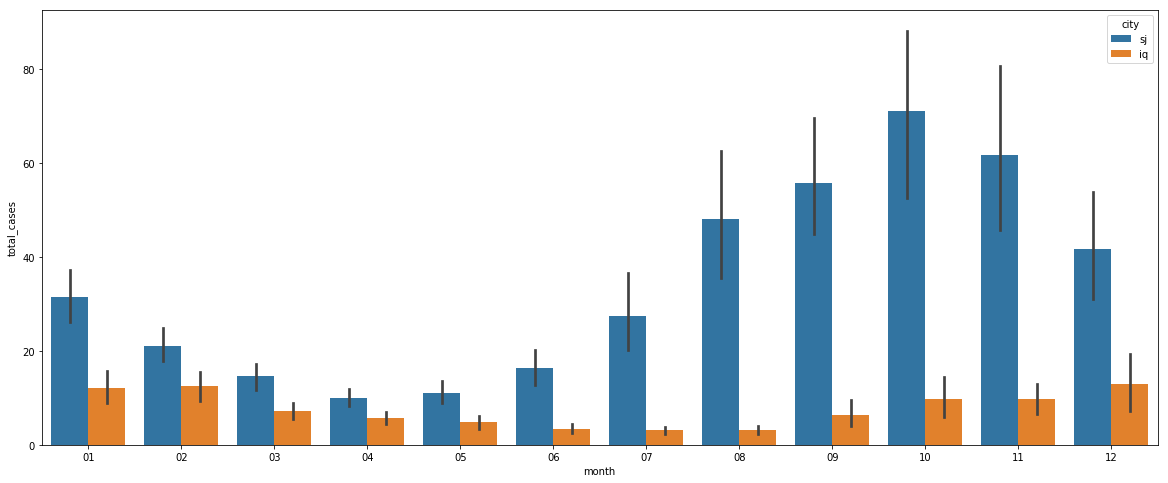

In [25]:
plt.figure(figsize=(20,8))
sns.barplot(x=train_labels['month'], y=train_labels['total_cases'], hue=train_labels['city']);

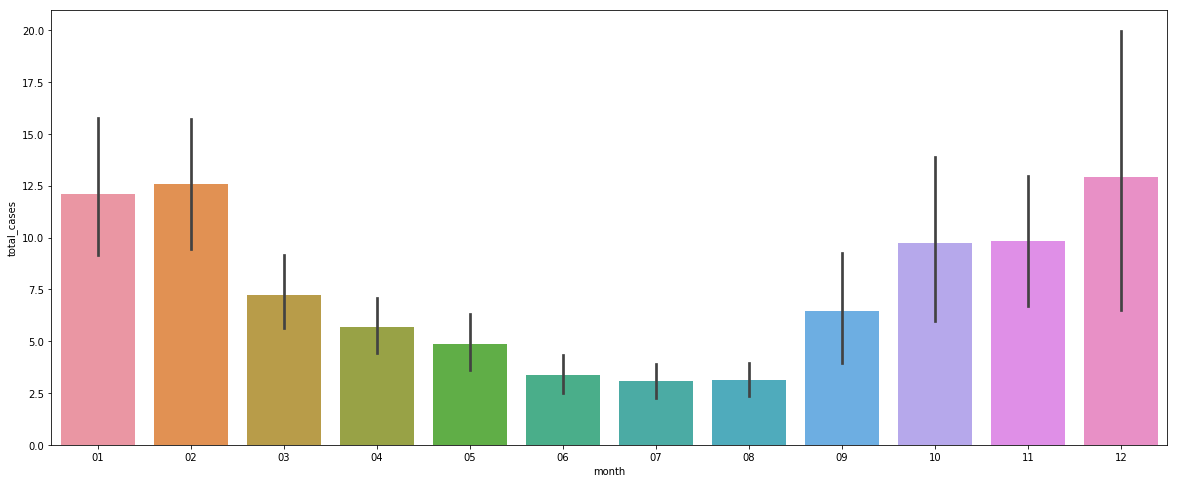

In [26]:
plt.figure(figsize=(20,8))
sns.barplot(x=train_iq.month, y=train_labels.total_cases)

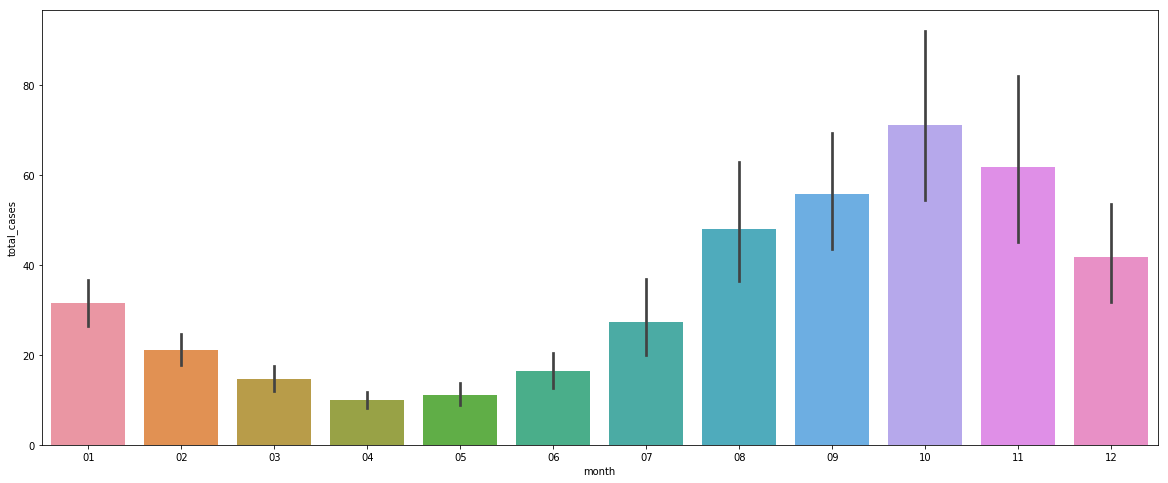

In [27]:
plt.figure(figsize=(20,8))
sns.barplot(x=train_sj.month, y=train_sj.total_cases)

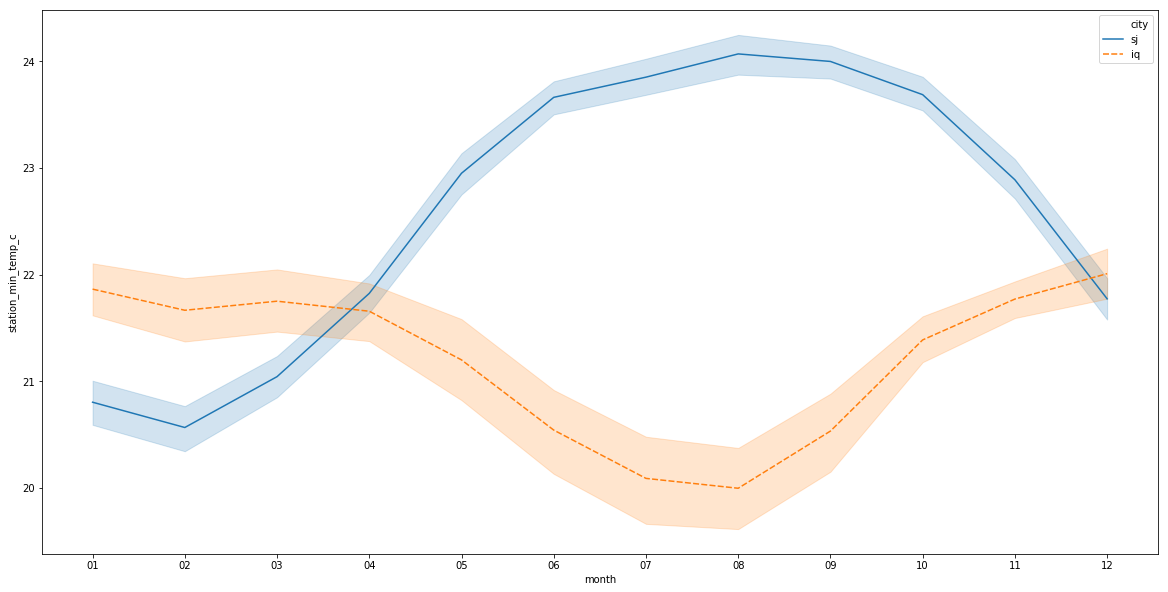

In [28]:
plt.figure(figsize=(20,10))
sns.lineplot(x=train_labels.month,y=train_labels['station_min_temp_c'], hue=train_labels.city,style=train_labels.city)

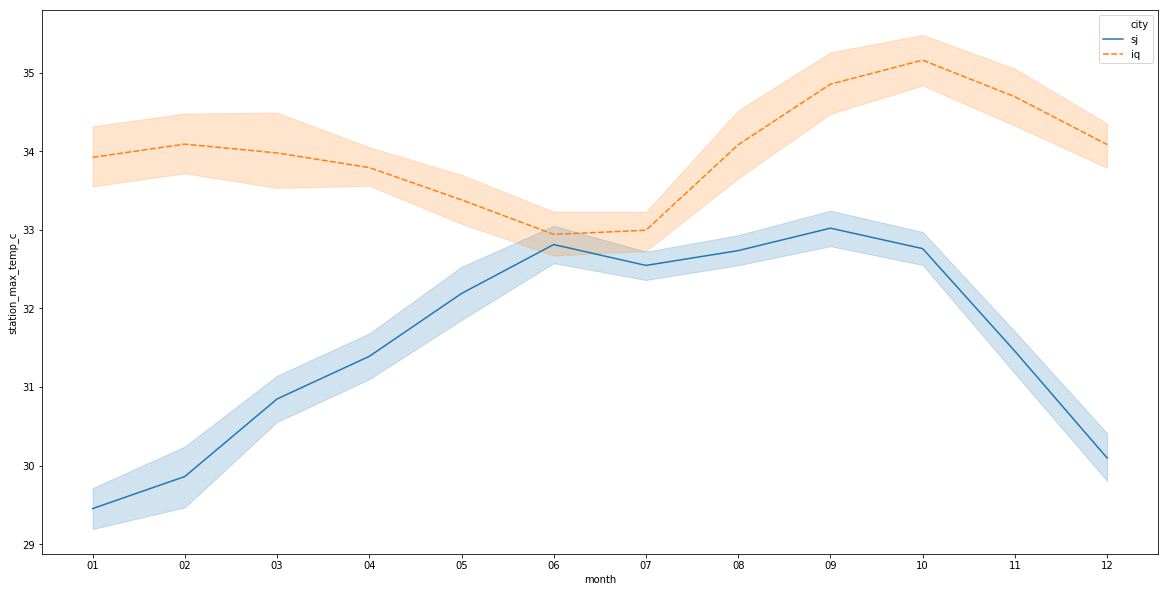

In [29]:
plt.figure(figsize=(20,10))
sns.lineplot(x=train_labels.month,y=train_labels['station_max_temp_c'], hue=train_labels.city,style=train_labels.city)

In [321]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn import model_selection
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor


In [354]:
train_iq = pd.DataFrame(train_iq.groupby(['city',
                                                 #'year', 
                                                 #'month',
                                                 'weekofyear', 
                                                 'ndvi_ne', 
                                                 'ndvi_nw', 
                                                 'ndvi_se', 
                                                 'ndvi_sw', 
                                                 'station_min_temp_c',
                                                 'reanalysis_air_temp_k',
                                                 'reanalysis_avg_temp_k'
                                                 ]).sum()['total_cases'])

In [356]:
train_iq.reset_index(inplace=True)

In [357]:
train_iq.sample(10)

city  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
200   iq          21  0.225467  0.185150  0.194200  0.248317   
20    iq           3  0.188229  0.220829  0.233243  0.169971   
220   iq          23  0.208500  0.256950  0.214883  0.233857   
344   iq          35  0.332043  0.321057  0.314614  0.324257   
455   iq          47  0.169983  0.289300  0.300983  0.170917   
116   iq          12  0.385986  0.424783  0.351414  0.346529   
380   iq          39  0.391533  0.320729  0.159586  0.332529   
356   iq          37  0.130267  0.151280  0.110814  0.117486   
118   iq          13  0.147529  0.269457  0.126857  0.205914   
443   iq          45  0.414886  0.324557  0.272743  0.365671   

     station_min_temp_c  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
200                22.5             297.602857             299.178571   
20                 21.8             298.034286             299.478571   
220                20.4             296.861429             298.242857   
344                20.0             299.218571             300.928571   
455                21.5             300.872857             301.914286   
116                21.7             297.887143             299.535714   
380                18.8             298.628571             299.971429   
356                23.0             298.457143             300.514286   
118                21.8             298.644286             300.392857   
443                21.8             299.504286             300.785714   

     total_cases  
200            6  
20            26  
220            4  
344            0  
455            0  
116            2  
380           12  
356            6  
118            4  
443           22

In [358]:
train_iq.shape

(511, 10)

In [359]:
X = train_iq.drop(['city','total_cases'],axis=1)
y = train_iq.total_cases
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [360]:
lgbm_iq = LGBMRegressor(max_depth=1, objective='poisson')
tscv = TimeSeriesSplit(n_splits=6)

lista_lgbm_iq=[]
lista_lgbm_iq_mae = []

for train_index, test_index in tscv.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    
    lgbm_iq.fit(X_train,y_train)
    
    y_pred_lgbm_iq = lgbm_iq.predict(X_test)
    
    lista_lgbm_iq.append(np.sqrt(mean_squared_error(y_test,y_pred_lgbm_iq)))
    lista_lgbm_iq_mae.append(np.sqrt(mean_absolute_error(y_test,y_pred_lgbm_iq)))    
    
print(np.mean(lista_lgbm_iq))
print(np.mean(lista_lgbm_iq_mae))

8.2273801465
2.39235958673


In [361]:
trainsj = pd.DataFrame(train_sj.groupby(['city',
                                                 #'year', 
                                                 #'month',
                                                 'weekofyear', 
                                                 'ndvi_ne', 
                                                 'ndvi_nw', 
                                                 'ndvi_se', 
                                                 'ndvi_sw', 
                                                 'station_min_temp_c',
                                                 'reanalysis_air_temp_k',
                                                 'reanalysis_avg_temp_k'
                                                 ]).sum()['total_cases'])

In [362]:
trainsj.reset_index(inplace=True)

In [363]:
trainsj.shape

(728, 10)

In [364]:
Xsj = trainsj.drop(['city','total_cases'], axis=1)
ysj = trainsj.total_cases
scaler = StandardScaler()
Xsj = scaler.fit_transform(Xsj)

In [365]:
lgbm = LGBMRegressor(objective='poisson', max_depth=1)
tscv = TimeSeriesSplit(n_splits=6)

lista_lgbm_sj = []
lista_lgbm_sj_mae = []

for train_index, test_index in tscv.split(Xsj,ysj):

    X_train_sj, X_test_sj = Xsj[train_index], Xsj[test_index] 
    y_train_sj, y_test_sj = ysj[train_index], ysj[test_index]
    
    lgbm.fit(X_train_sj,y_train_sj)
    
    y_pred_lgbm_sj = lgbm.predict(X_test_sj)
    
    lista_lgbm_sj.append(np.sqrt(mean_squared_error(y_test_sj,y_pred_lgbm_sj)))
    lista_lgbm_sj_mae.append(np.sqrt(mean_absolute_error(y_test_sj,y_pred_lgbm_sj)))
    
print(np.mean(lista_lgbm_sj))
print(np.mean(lista_lgbm_sj_mae))

31.5263738841
4.39013052823


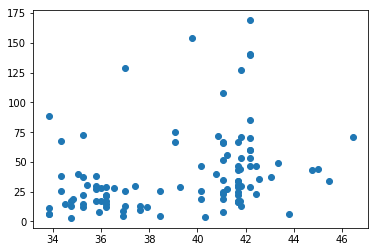

In [366]:
plt.scatter(y_pred_lgbm_sj, y_test_sj)

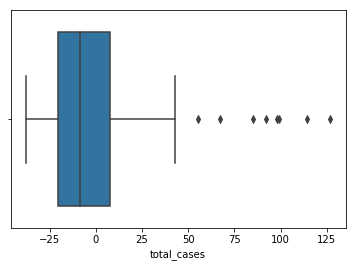

In [367]:
yresult = y_test_sj - y_pred_lgbm_sj

sns.boxplot(yresult)

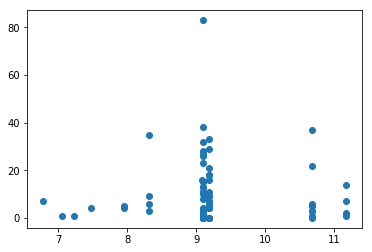

In [368]:
plt.scatter(y_pred_lgbm_iq, y_test)

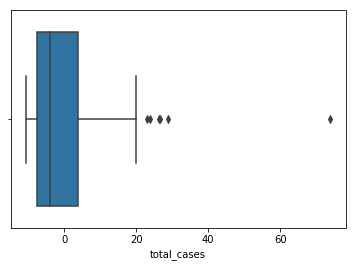

In [369]:
yresult = y_test - y_pred_lgbm_iq

sns.boxplot(yresult)

Text(0.5,1,'Correlations for San Jose')

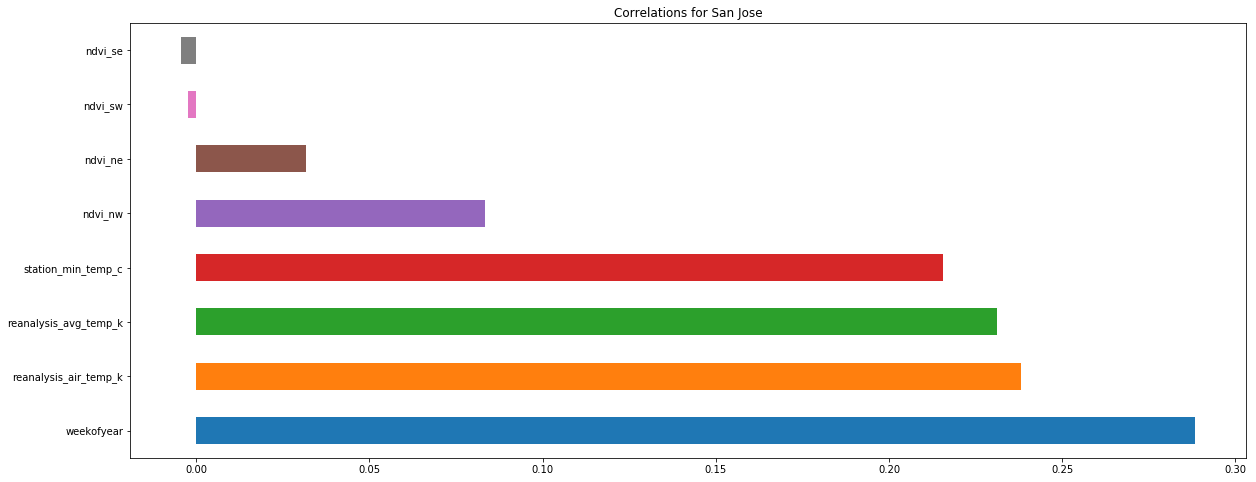

In [370]:
sj_correlations = trainsj.corr()
iq_correlations = train_iq.corr()
plt.figure(figsize=(20,8))
(sj_correlations['total_cases'].drop('total_cases').sort_values(ascending=False).plot.barh())
plt.title('Correlations for San Jose')

Text(0.5,1,'Correlations for Iquitos')

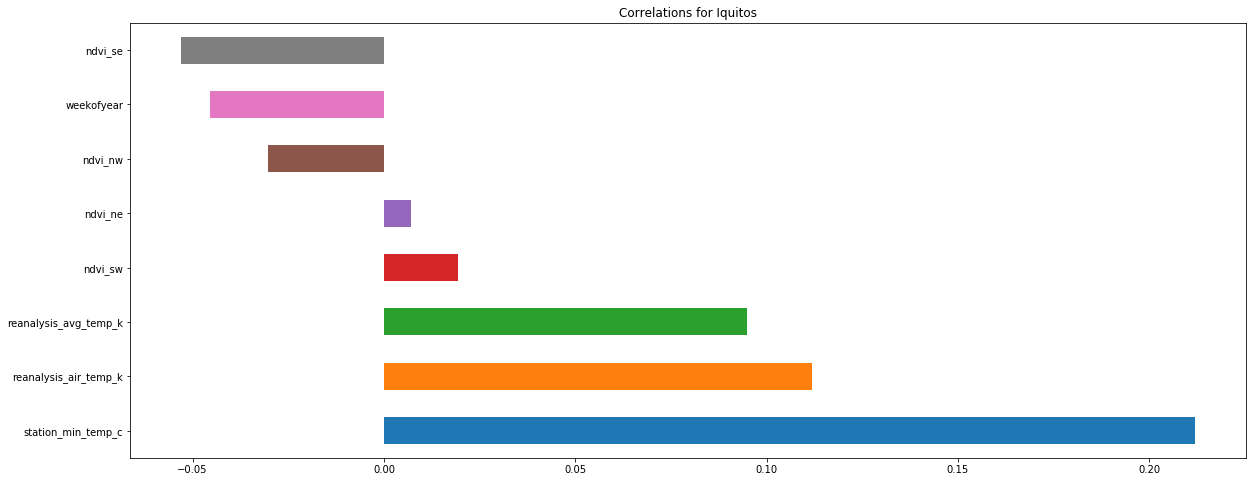

In [371]:
plt.figure(figsize=(20,8))
(iq_correlations['total_cases'].drop('total_cases').sort_values(ascending=False).plot.barh())
plt.title('Correlations for Iquitos')

In [372]:
data_iq = pd.DataFrame(X_train, columns=train_iq.drop(['city','total_cases'],axis=1).columns)

In [373]:
explainer = shap.TreeExplainer(lgbm_iq, data=data_iq)
shap_values = explainer.shap_values(data_iq)

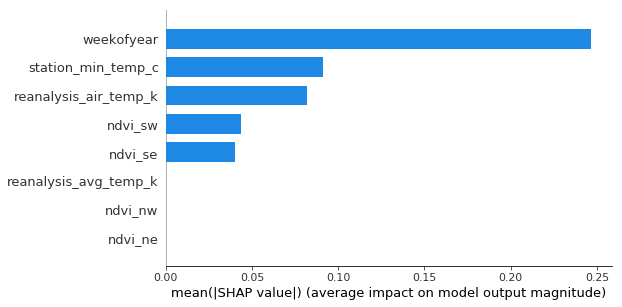

In [374]:
shap.summary_plot(shap_values, data_iq, plot_type='bar')

In [375]:
data_sj = pd.DataFrame(X_train_sj, columns=trainsj.drop(['city','total_cases'],axis=1).columns)

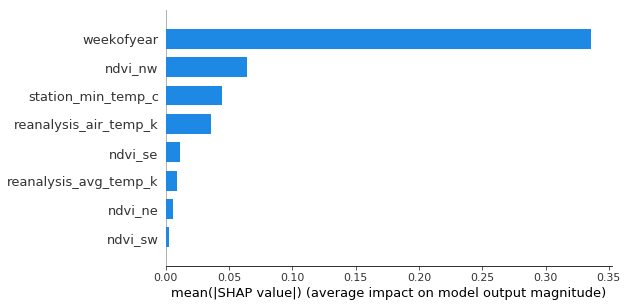

In [376]:
explainer = shap.TreeExplainer(lgbm, data=data_sj)
shap_values = explainer.shap_values(data_sj)

shap.summary_plot(shap_values, data_sj, plot_type='bar')

In [377]:
test_iq = test[test['city']=='iq']

In [378]:
test_sj = test[test['city']=='sj']

In [379]:
test_iq.dropna(inplace=True)

In [380]:
test_iq.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [381]:
test_sj.fillna(test_sj.mean(), inplace=True)

In [382]:
features = ['weekofyear','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',
            'station_min_temp_c','reanalysis_air_temp_k','reanalysis_avg_temp_k']

In [383]:
testiq = test_iq[features]

In [384]:
testsj = test_sj[features]

In [385]:
testiq

weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  station_min_temp_c  \
260          26  0.183783  0.142500  0.225129  0.150214                21.5   
261          27  0.291657  0.272267  0.330700  0.320914                21.2   
262          28  0.208543  0.366457  0.212629  0.255514                21.6   
263          29  0.089286  0.063214  0.122057  0.081957                14.2   
264          30  0.306100  0.327683  0.250086  0.267914                16.9   
265          31  0.342020  0.304857  0.332357  0.345729                20.0   
266          32  0.332217  0.384817  0.356600  0.353917                18.5   
267          33  0.221814  0.224100  0.273086  0.231243                21.0   
269          35  0.342014  0.301929  0.314700  0.381000                21.0   
270          36  0.116583  0.100283  0.140683  0.113817                21.0   
271          37  0.259167  0.267320  0.212329  0.326543                21.0   
272          38  0.306214  0.263586  0.321543  0.379171                19.1   
273          39  0.386786  0.372629  0.379614  0.397357                21.2   
274          40  0.304150  0.336867  0.253883  0.327533                20.5   
275          41  0.329043  0.294271  0.307029  0.393814                19.8   
276          42  0.244129  0.192883  0.232229  0.281929                19.8   
277          43  0.239600  0.237529  0.194071  0.229200                21.2   
278          44  0.284029  0.321843  0.268243  0.198429                21.2   
279          45  0.356186  0.393329  0.281200  0.390929                20.0   
280          46  0.191871  0.232657  0.256186  0.183871                20.5   
281          47  0.329471  0.387529  0.310400  0.288486                20.5   
282          48  0.185100  0.184071  0.098257  0.252657                20.9   
283          49  0.206486  0.243629  0.229629  0.230557                21.4   
284          50  0.306357  0.290671  0.337871  0.311814                21.8   
285          51  0.247814  0.174600  0.219657  0.241829                20.5   
286          52  0.277500  0.304367  0.235656  0.289433                22.0   
287           1  0.367743  0.320143  0.312771  0.388257                21.2   
288           2  0.219443  0.235283  0.200029  0.277986                21.5   
289           3  0.261129  0.294029  0.239329  0.321057                21.0   
290           4  0.240200  0.253829  0.209229  0.229843                21.2   
..          ...       ...       ...       ...       ...                 ...   
386          48  0.376286  0.388143  0.433229  0.362914                22.2   
387          49  0.367617  0.354980  0.325817  0.281133                22.2   
388          50  0.130650  0.265457  0.223043  0.136517                21.0   
389          51  0.256983  0.223471  0.233883  0.253100                22.0   
390           1  0.255829  0.268657  0.268414  0.244471                22.8   
391           2  0.188229  0.139143  0.252729  0.170586                21.2   
392           3  0.252200  0.184743  0.241700  0.233014                22.6   
393           4  0.183729  0.127057  0.165986  0.163729                22.5   
394           5  0.368857  0.375329  0.336871  0.418014                23.2   
395           6  0.274957  0.270914  0.293043  0.294400                22.4   
396           7  0.267029  0.190729  0.279186  0.282186                22.4   
397           8  0.297967  0.327750  0.244357  0.308671                21.7   
398           9  0.345517  0.346867  0.337117  0.382550                21.8   
399          10  0.295343  0.309857  0.254686  0.263729                22.6   
400          11  0.223671  0.119450  0.224800  0.228371                22.2   
401          12  0.231800  0.195583  0.204786  0.250186                22.8   
402          13  0.263429  0.210614  0.269414  0.245871                22.0   
403          14  0.223543  0.208543  0.239971  0.218557                21.8   
404          15  0.263200  0.237400  0.250143  0.199114

In [386]:
iq_results = lgbm_iq.predict(testiq)

In [387]:
sj_results = lgbm.predict(testsj)

In [388]:
print(iq_results.shape)
print(sj_results.shape)

(143,)
(260,)


In [389]:
sj_results

array([ 56.87461506,  56.87461506,  56.87461506,  56.87461506,
        56.87461506,  56.87461506,  56.87461506,  56.87461506,
        56.87461506,  56.87461506,  56.87461506,  56.87461506,
        56.87461506,  56.87461506,  56.87461506,  56.87461506,
        56.87461506,  56.87461506,  56.87461506,  56.87461506,
        56.87461506,  56.39552226,  56.87461506,  56.87461506,
        56.87461506,  56.39552226,  56.87461506,  56.87461506,
        56.87461506,  56.87461506,  56.87461506,  56.87461506,
        56.39552226,  56.39552226,  56.87461506,  56.87461506,
        56.39552226,  56.87461506,  56.87461506,  56.87461506,
        56.87461506,  56.87461506,  56.87461506,  56.39552226,
        56.87461506,  56.87461506,  56.87461506,  56.87461506,
        56.87461506,  56.87461506,  56.87461506,  56.87461506,
        56.87461506,  56.87461506,  56.87461506,  56.87461506,
        56.87461506,  56.87461506,  56.87461506,  56.87461506,
        56.87461506,  56.87461506,  56.87461506,  56.87